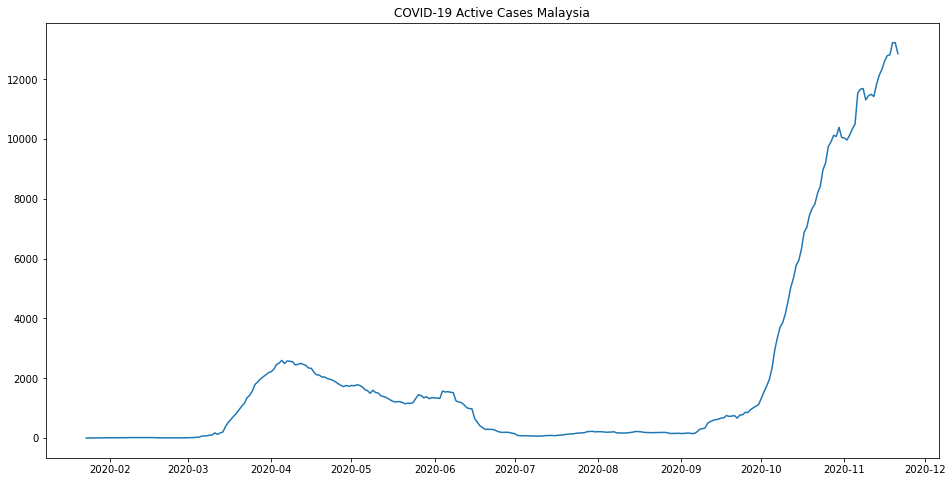

In [ ]:
import requests
import json
import matplotlib.pyplot as plt
import datetime

URL = 'https://api.coronatracker.com/v3/analytics/trend/country?countryCode=MY&startDate=2020-01-23&endDate=2020-12-31'
response = requests.get(URL)
data = json.loads(response.text)

active_cases = []
date_reported = []
for d in data:
  active_case = d['total_confirmed'] - d['total_deaths'] - d['total_recovered']
  timestamp = d['last_updated']
  formatted_date = datetime.datetime.strptime(timestamp.split('T')[0], '%Y-%m-%d')
  active_cases.append(active_case)
  date_reported.append(formatted_date)

plt.figure(figsize=(16,8))
plt.title('COVID-19 Active Cases Malaysia')
plt.plot(date_reported, active_cases)
plt.savefig('COVID-19 Active Cases Malaysia.png')


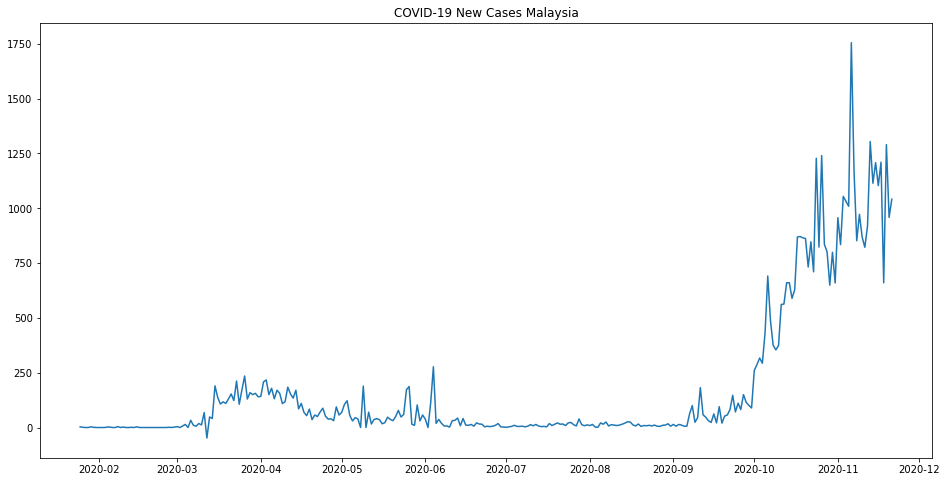

1755


In [ ]:
# new cases
import requests
import json
import matplotlib.pyplot as plt
import datetime

URL = 'https://api.coronatracker.com/v3/analytics/trend/country?countryCode=MY&startDate=2020-01-01&endDate=2020-12-31'
response = requests.get(URL)
data = json.loads(response.text)

new_cases = []
date_reported = []
for d in data:
  index = data.index(d)
  if index != 0:
    new_case = d['total_confirmed'] - data[index-1]['total_confirmed']
    timestamp = d['last_updated']
    formatted_date = datetime.datetime.strptime(timestamp.split('T')[0], '%Y-%m-%d')
    new_cases.append(new_case)
    date_reported.append(formatted_date)

plt.figure(figsize=(16,8))
plt.title('COVID-19 New Cases Malaysia')
plt.plot(date_reported, new_cases)
plt.show()
print(max(new_cases))


In [ ]:
# new cases
import requests
import json
import datetime

URL = 'https://api.coronatracker.com/v3/analytics/trend/country?countryCode=MY&startDate=2020-01-23&endDate=2020-11-01'
response = requests.get(URL)
data = json.loads(response.text)

zero_new_cases_date = []
for d in data:
  index = data.index(d)
  if index == 0:
    new_case = d['total_confirmed']
  else:
    new_case = d['total_confirmed'] - data[index-1]['total_confirmed']
  timestamp = d['last_updated'].split("T")[0]
  if new_case < 0:
    zero_new_cases_date.append(timestamp)

for case_date in zero_new_cases_date:
  print(case_date)



2020-03-12
